In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Define the file paths
loan_file_path = r'C:\Users\3913\Desktop\Loan Analysis\loan.csv'
data_dict_file_path = r'C:\Users\3913\Desktop\Loan Analysis\Data_Dictionary.csv'

# Load the loan dataset
loan_data = pd.read_csv(loan_file_path, low_memory=False)

# Display basic information about the loan dataset
print(loan_data.info())
print(loan_data.head())

# Load the Data Dictionary
data_dict = pd.read_csv(data_dict_file_path)

# Display the first few rows of the Data Dictionary
print(data_dict.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                N

In [2]:
# Check and handle missing values
missing_values = loan_data.isnull().sum().sort_values(ascending=False)
columns_to_drop = missing_values[missing_values > 0.9 * len(loan_data)].index.tolist() + ['id', 'member_id']
loan_data_cleaned = loan_data.drop(columns=columns_to_drop, axis=1)
print(loan_data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

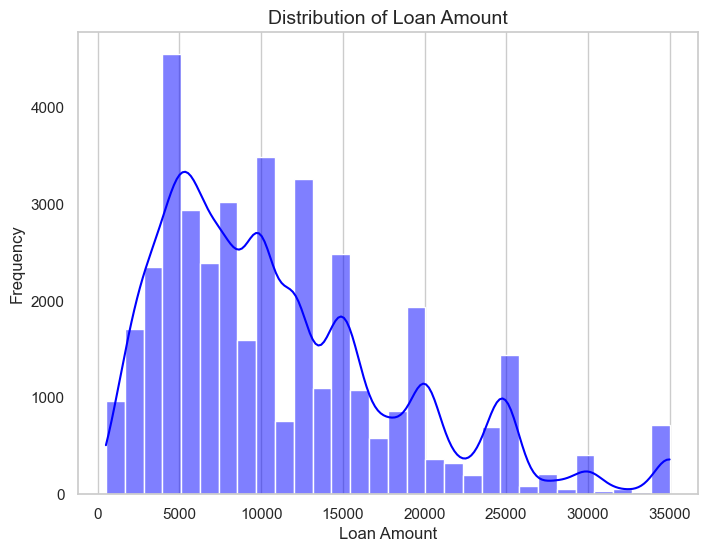

In [3]:
# Univariate Analysis: Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()


C:\Users\3913\AppData\Local\Temp\ipykernel_20436\3853020541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


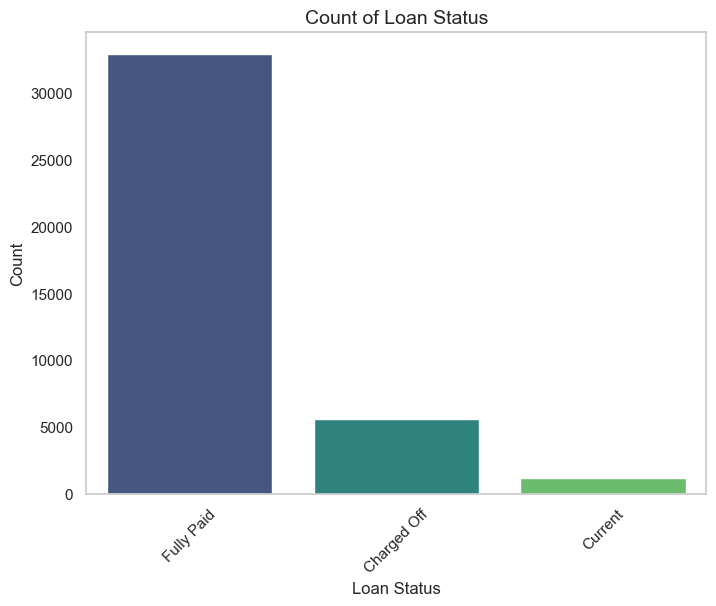

In [4]:
# Loan Status Count
plt.figure(figsize=(8, 6))
loan_status_counts = loan_data_cleaned['loan_status'].value_counts()

sns.barplot(
    x=loan_status_counts.index,
    y=loan_status_counts.values,
    palette='viridis'
)
plt.title('Count of Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


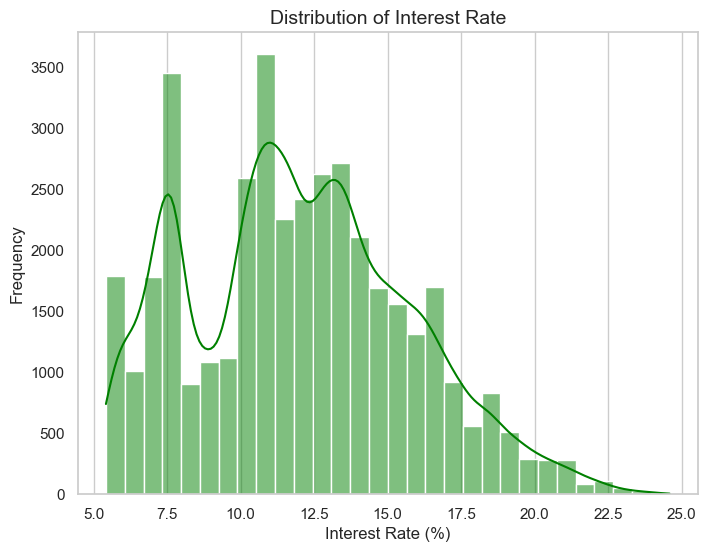

In [5]:
# Interest Rate Distribution
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)
plt.figure(figsize=(8, 6))
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rate', fontsize=14)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()


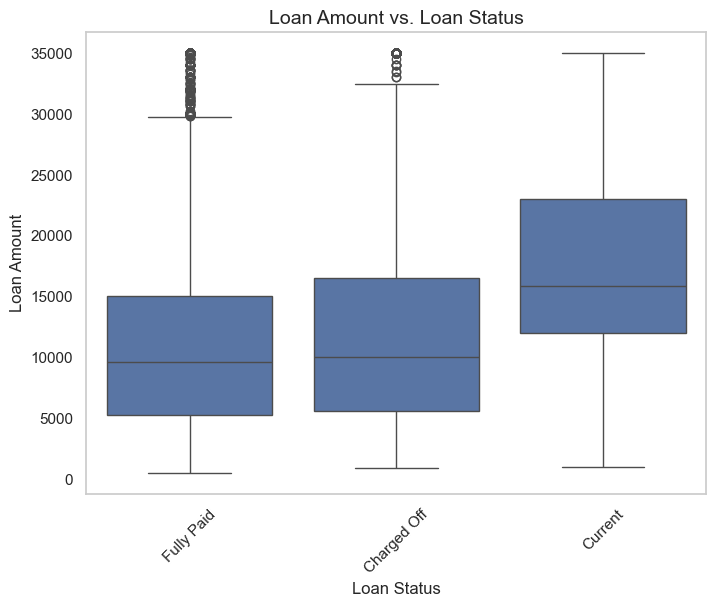

In [6]:
# Loan Amount vs. Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned)
plt.title('Loan Amount vs. Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


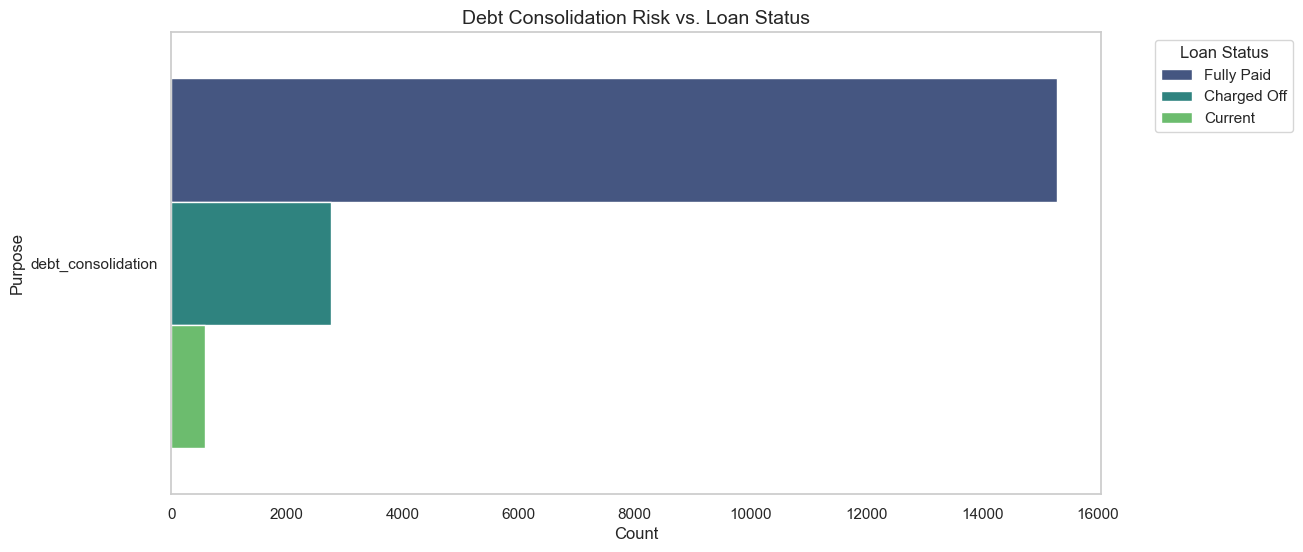

In [7]:
# Loan Purpose vs. Loan Status focusing on Debt Consolidation
plt.figure(figsize=(12, 6))
debt_consolidation_data = loan_data_cleaned[loan_data_cleaned['purpose'] == 'debt_consolidation']
sns.countplot(y='purpose', hue='loan_status', data=debt_consolidation_data, palette='viridis')
plt.title('Debt Consolidation Risk vs. Loan Status', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Purpose', fontsize=12)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()


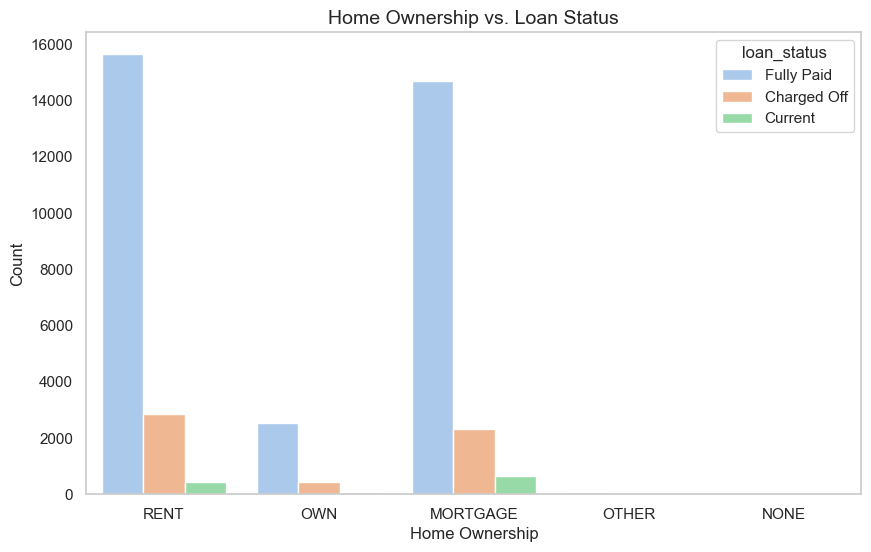

In [8]:
# Home Ownership vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_cleaned, palette='pastel')
plt.title('Home Ownership vs. Loan Status', fontsize=14)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()


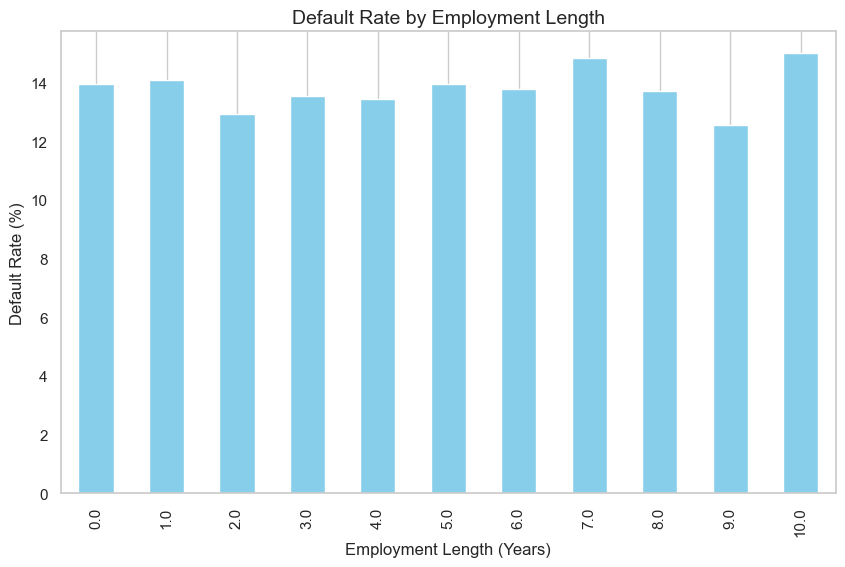

In [9]:
# Default Rate by Employment Length
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].astype(str)

# Replace non-numeric employment lengths and extract numeric values
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].replace({'10+ years': '10 years', '< 1 year': '0 years', 'nan': None})
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.extract(r'(\d+)').astype(float)

# Calculate the default rate by employment length
default_rate_by_emp_length = (
    loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off']
    .groupby('emp_length')['loan_status']
    .count() / loan_data_cleaned.groupby('emp_length')['loan_status'].count() * 100
)

# Plot the default rate by employment length
plt.figure(figsize=(10, 6))
default_rate_by_emp_length.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Employment Length', fontsize=14)
plt.xlabel('Employment Length (Years)', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.grid(axis='y')
plt.show()


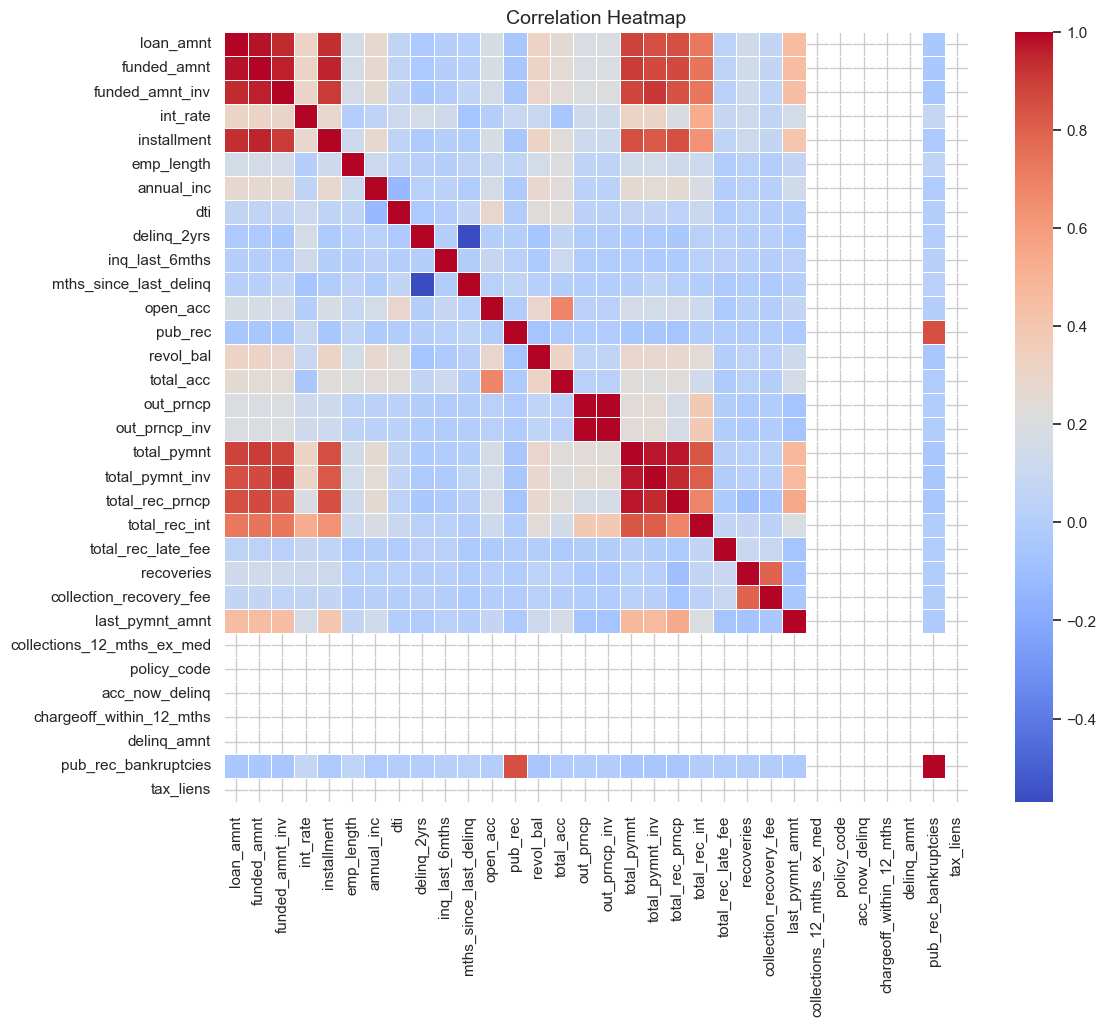

In [10]:
# Correlation Heatmap
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()
